# Data Visualization

The goal of this notebook is to create all the visualizations required for the project. Visualisations are a critical part of data analysis, and the below visualisations will help us to quickly grasp the information learned during our analysis.

### Prelimineries

Lets start by installing and importing all the packages to load data from files and plot graphs

In [1]:
%%capture
%pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl

### Plot 1

A histogram showing the number of fires occurring every 50 mile distance from Stockton, CA for all fires ranging up to 1800 miles away. The histogram indicates the distance cut-off used for my modeling work, i.e, 650 miles.

For this, lets start by loading file we generated towards the end of [1_data_aquisition_wildfire.ipynb](1_data_aquisition_wildfire.ipynb). This file should already have information about the closest distance of the wildfire to Stockton, CA

In [3]:
wildfires_with_distances = pl.read_csv("generated_files/intermediate/wildfires_with_distances.csv")
wildfires_with_distances

OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,Listed_Fire_Names,Listed_Fire_Codes,Listed_Fire_IDs,Listed_Fire_IRWIN_IDs,Listed_Fire_Dates,Listed_Fire_Causes,Listed_Fire_Cause_Class,Listed_Rx_Reported_Acres,Listed_Map_Digitize_Methods,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,Closest_Distance_Miles
i64,i64,str,i64,i64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,f64
14600,14600,"""Wildfire""",1964,1,"""1 (1), 3 (3)""",65338.877636,26441.705659,"""Comb_National_NIFC_Interagency…","""Wildfire (3), Likely Wildfire …","""COYOTE (4)""","""No code provided (4)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (1…","""Undetermined (4)""",null,null,null,null,0.263753,null,"""No""",112240.801495,2.6442e8,250.77864
14601,14601,"""Wildfire""",1964,1,"""1 (2), 3 (3), 5 (1)""",55960.694158,22646.489455,"""Comb_National_NIFC_Interagency…","""Wildfire (5), Likely Wildfire …","""C. HANLY (5), Hanley (1)""","""No code provided (5), 198 (1)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (1…","""Undetermined (6)""",null,null,null,null,0.224592,null,"""No""",112566.141954,2.2646e8,76.420104
14602,14602,"""Wildfire""",1964,1,"""1 (2), 3 (3)""",19218.105903,7777.29153,"""Comb_National_NIFC_Interagency…","""Wildfire (4), Likely Wildfire …","""COZY DELL (5)""","""No code provided (5)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (1…","""Undetermined (5)""",null,null,null,null,0.138493,null,"""No""",84004.974692,7.7773e7,327.916719
14603,14603,"""Wildfire""",1964,1,"""1 (2), 3 (3)""",18712.494746,7572.677954,"""Comb_National_NIFC_Interagency…","""Wildfire (4), Likely Wildfire …","""HAYFORK HWY. #2 (5)""","""No code provided (5)""","""0 (3)""",null,"""Listed Wildfire Discovery Date…","""9 - Miscellaneous (1)""","""Undetermined (4), Human (1)""",null,null,null,null,0.39196,null,"""No""",49273.004457,7.5727e7,198.853859
14604,14604,"""Wildfire""",1964,1,"""1 (4), 3 (6)""",16887.001024,6833.926855,"""Comb_National_NIFC_Interagency…","""Wildfire (8), Likely Wildfire …","""MATTOLE (5), ROBERTS COOP. ESC…","""No code provided (10)""","""0 (6)""",null,"""Listed Wildfire Discovery Date…","""14 - Unknown / Unidentified (2…","""Undetermined (10)""",null,null,null,null,0.392989,null,"""No""",46746.577459,6.8339e7,219.778526
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
135057,135057,"""Prescribed Fire""",2020,8,"""8 (3)""",16.412148,6.641761,"""Comb_National_Rx_Only_BLM_VTRT…","""Prescribed Fire (3)""","""WEW CA Broadcast (3)""","""No code provided (3)""","""NFPORS6319933 (3)""",null,"""Listed Prescribed Fire End Dat…","""Human (3)""","""Human (3)""",null,null,null,"""Caution, this Prescribed Fire …",0.177425,null,"""No""",2168.90074,66417.60679,406.63243
135058,135058,"""Prescribed Fire""",2020,8,"""8 (1)""",7.050837,2.853373,"""Comb_National_Rx_Only_BLM_VTRT…","""Prescribed Fire (1)""","""2_PHMA_FIAT_Beulah_East_Bendir…","""No code provided (1)""","""NFPORS6318576 (1)""",null,"""Listed Prescribed Fire End Dat…","""Human (1)""","""Human (1)""",null,null,null,"""Caution, this Prescribed Fire …",0.374368,null,"""No""",978.666221,28533.725602,449.230338
135059,135059,"""Prescribed Fire""",2020,8,"""8 (4)""",9.342668,3.780843,"""Comb_National_Rx_Only_BLM_VTRT…","""Prescribed Fire (4)""","""2_PHMA_FIAT_Beulah_East_Bendir…","""No code provided (4)""","""NFPORS6318576 (4)""",null,"""Listed Prescribed Fire End Dat…","""Human (4)""","""Human (4)""",null,null,null,"""Caution, this Prescribed Fire …",0.123888,null,"""No""",1958.32666,37808.434086,448.331439


We want to create a histogram of the number of wildfires per 50 miles radius, starting from 0 miles to 1800 miles. For this, we can use the bins parameter of the histogram, which does the bucketing for us

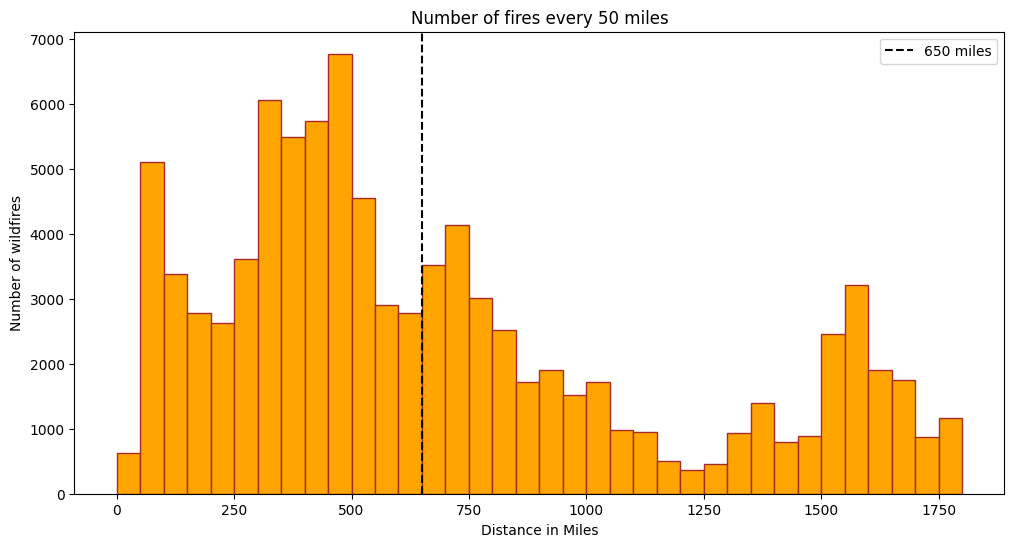

In [4]:
plt.figure(figsize=(12,6))

plt.hist(wildfires_with_distances["Closest_Distance_Miles"], bins = range(0,1801,50), edgecolor = "brown", color = "orange")

# Set the X-axis and Y axis labels, along with the title of the plot.
plt.xlabel('Distance in Miles')
plt.ylabel('Number of wildfires')
plt.title('Number of fires every 50 miles')

# Mark the 650 miles as dotted line on the plot
plt.axvline(x = 650, color = 'black', label = '650 miles', linestyle='dashed')

plt.legend(loc="upper right")

plt.show()

### Plot 2

A time series graph of total acres burned per year for the fires occurring in 650 miles from Stockton, CA.

For this, we need to do some data aggregation to find the total acres burned per year. We can group by the `Fire_Year` and sum up the `GIS_Acres` for this value

In [5]:
closest_wildfires = (
    wildfires_with_distances
    .filter(
        # filter for wildfires within 650 miles
        pl.col("Closest_Distance_Miles") <= 650
    )
    .group_by(
        "Fire_Year"
    )
    .agg(
        (pl.sum("GIS_Acres")/100000).round(2).alias("GIS_Acres_in_millions")
    )
    .sort(by = "Fire_Year")
)
closest_wildfires

Fire_Year,GIS_Acres_in_millions
i64,f64
1964,3.95
1965,1.38
1966,6.74
1967,3.24
1968,2.78
…,…
2016,21.86
2017,46.64
2018,48.56


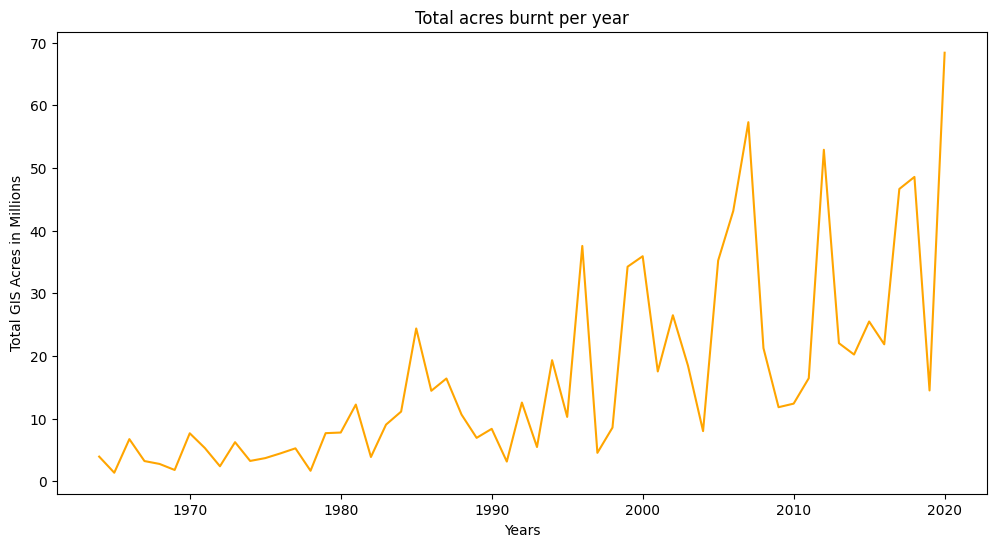

In [6]:
plt.figure(figsize=(12,6))

plt.plot(closest_wildfires["Fire_Year"],closest_wildfires["GIS_Acres_in_millions"] , color = "orange")

# Set the X-axis and Y axis labels, along with the title of the plot.
plt.xlabel('Years')
plt.ylabel('Total GIS Acres in Millions')
plt.title('Total acres burnt per year')

plt.show()

### Plot 3

A time series graph containing the fire smoke estimates and AQI estimates for Stockton, CA.

For this, we need to plot data from 2 different files onto a single plot. So lets start by loading data from both the files

In [7]:
yearly_aqi_weighted_avg = pl.read_csv("generated_files/intermediate/yearly_weighted_aqi_1964-2024.csv")
yearly_aqi_weighted_avg

year,weighted_avg_aqi
i64,f64
1964,32.41
1965,25.73
1966,21.06
1967,26.93
1968,25.57
…,…
2020,59.25
2021,52.98
2022,43.03


In [8]:
smoke_estimates_yearly = pl.read_csv("generated_files/intermediate/smoke_estimates_1964-2024.csv")
smoke_estimates_yearly

Fire_Year,smoke_estimate
i64,f64
1964,17.757395
1965,7.891844
1966,18.259437
1967,10.625853
1968,16.536229
…,…
2016,29.003212
2017,48.263021
2018,38.374925


Text(0.5, 1.0, 'AQI estimates and Smoke estimates over the years')

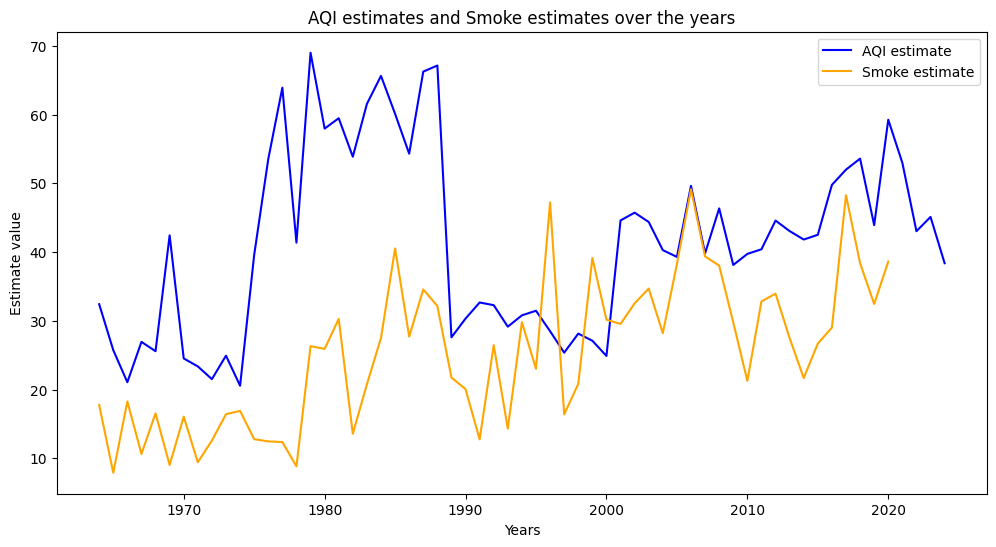

In [9]:
plt.figure(figsize=(12,6))

plt.plot(yearly_aqi_weighted_avg["year"],yearly_aqi_weighted_avg["weighted_avg_aqi"] , color = "blue", label="AQI estimate")
plt.plot(smoke_estimates_yearly["Fire_Year"], smoke_estimates_yearly["smoke_estimate"], color = "orange", label = "Smoke estimate")
plt.legend(loc="upper right")

# Set the X-axis and Y axis labels, along with the title of the plot.
plt.xlabel('Years')
plt.ylabel('Estimate value')
plt.title('AQI estimates and Smoke estimates over the years')